In [1]:
import pandas as pd

# Cargar los datos de entrenamiento
train_data = pd.read_csv('../data/train.csv')

# Mostrar las primeras filas del DataFrame
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar los gráficos para que se muestren dentro del notebook
%matplotlib inline

In [5]:
# Información general sobre el DataFrame
train_data.info()

# Estadísticas descriptivas del DataFrame
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


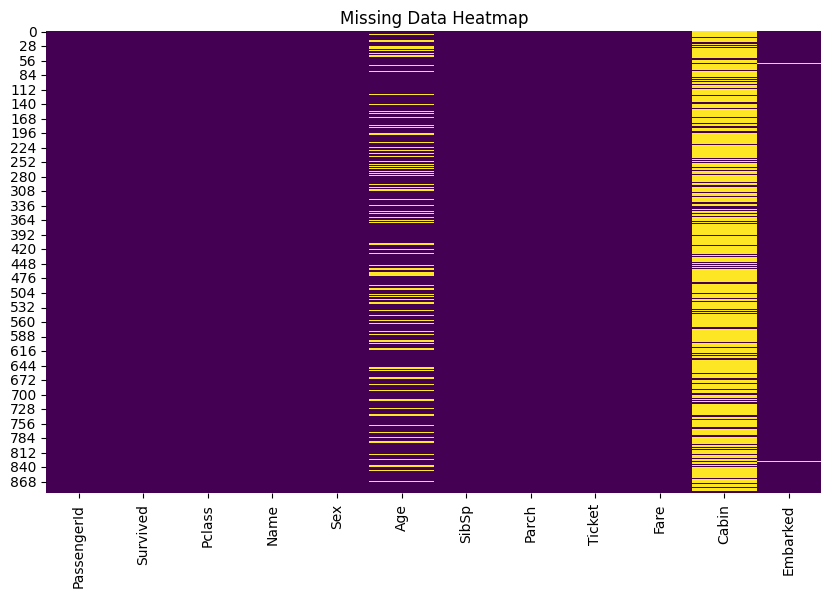

In [6]:
# Visualizar los datos faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

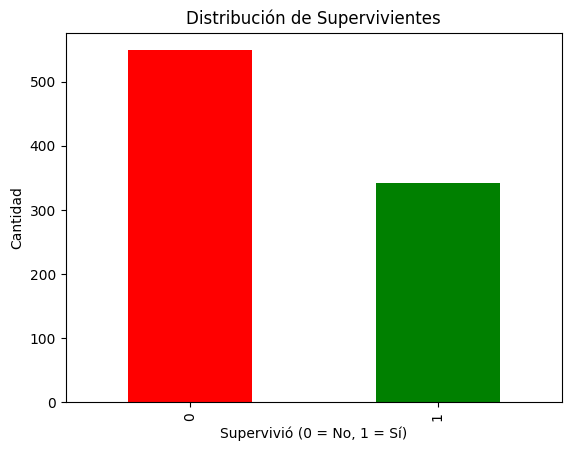

In [7]:
# Contar el número de supervivientes y no supervivientes
train_data['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribución de Supervivientes')
plt.xlabel('Supervivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

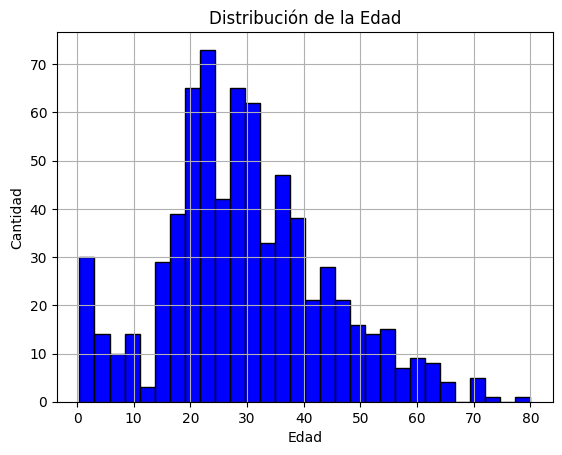

In [8]:
# Histograma de la distribución de la edad
train_data['Age'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

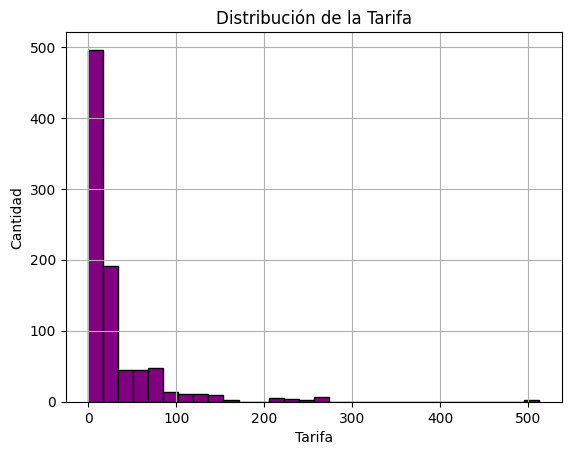

In [9]:
# Histograma de la distribución de la tarifa
train_data['Fare'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribución de la Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Cantidad')
plt.show()

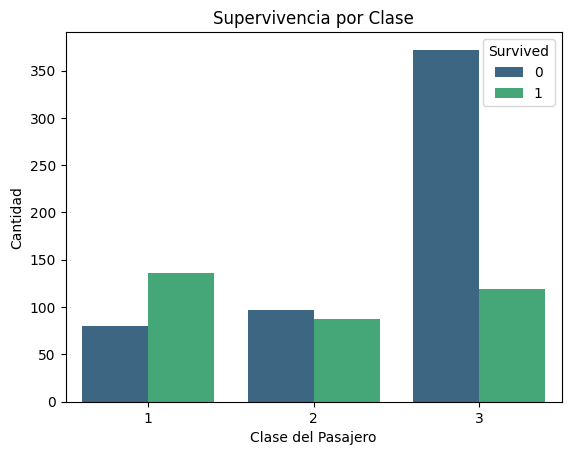

In [10]:
# Supervivencia por clase
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='viridis')
plt.title('Supervivencia por Clase')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Cantidad')
plt.show()

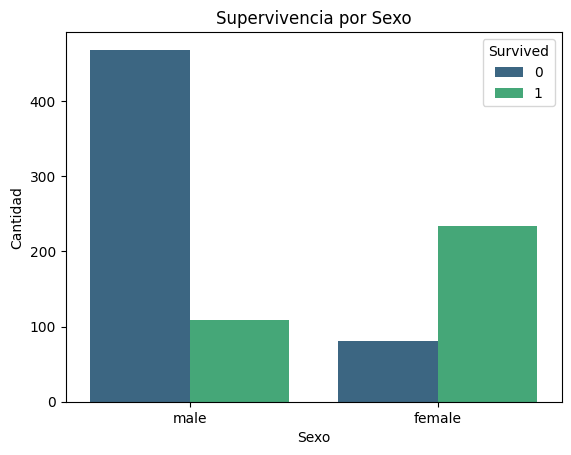

In [11]:
# Supervivencia por sexo
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='viridis')
plt.title('Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

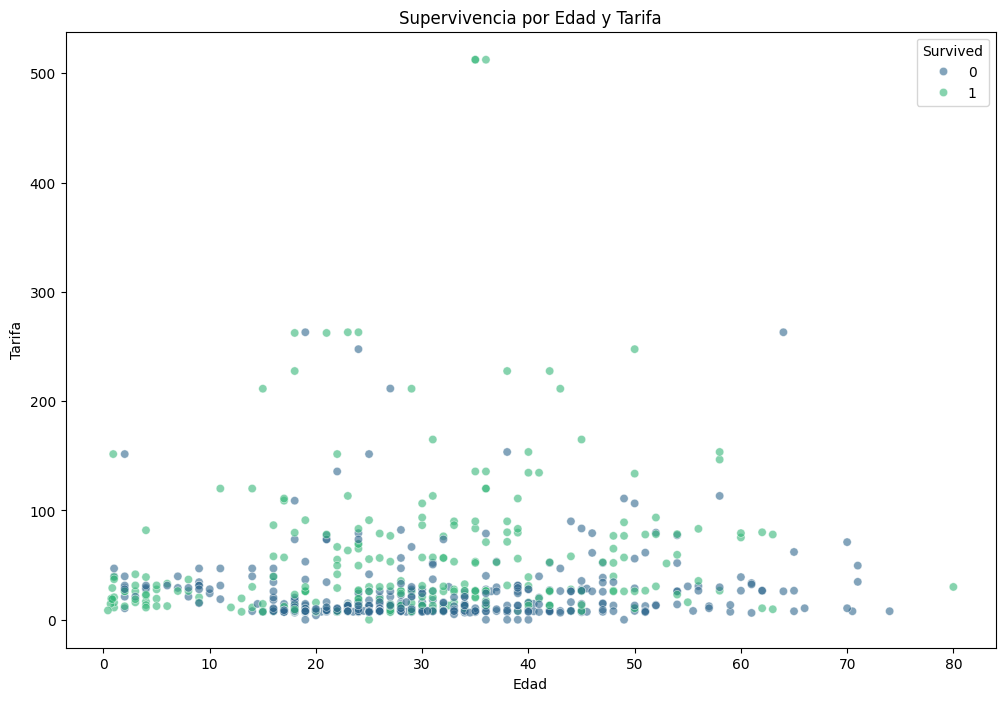

In [12]:
# Supervivencia por edad y tarifa
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, palette='viridis', alpha=0.6)
plt.title('Supervivencia por Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

In [13]:
# Rellenar los valores nulos en 'Age' con la mediana
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Rellenar los valores nulos en 'Embarked' con el valor más frecuente
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Eliminar la variable 'Cabin' debido a demasiados valores nulos
train_data.drop(columns=['Cabin'], inplace=True)

# Verificar si hay valores nulos restantes
train_data.isnull().sum()

C:\Users\Elián\AppData\Local\Temp\ipykernel_4260\894747919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Elián\AppData\Local\Temp\ipykernel_4260\894747919.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Convertir la variable 'Sex' en variable numérica
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar las primeras filas del DataFrame modificado
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [15]:
# Selección de características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn'

In [18]:
pip install scikit-learn



SyntaxError: invalid syntax (341811935.py, line 1)

In [19]:
rom sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SyntaxError: invalid syntax (4103545244.py, line 1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [22]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[91 14]
 [18 56]]


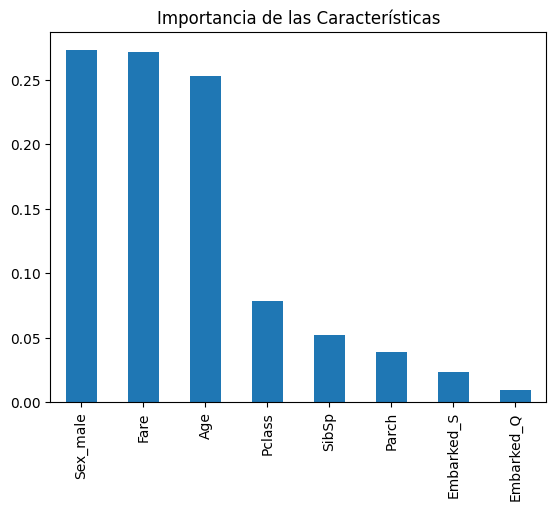

In [25]:
# Importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Importancia de las Características')
plt.show()